In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

# Ejercicio 2

In [3]:
def funcion_normal(valor,media=0,varianza=1):
    
    numerador=-(valor-media)**2
    constante=1/(np.sqrt(2*varianza*np.pi))
    
    return constante* (np.exp((numerador/(2*varianza))))


In [5]:

datos=np.arange(-8,8,0.1)
df_datos=pd.DataFrame(datos,columns=['serie'])

df_datos['distribucion_z']=df_datos['serie'].apply(funcion_normal,media=0,varianza=1)
df_datos['distribucion_g']=df_datos['serie'].apply(funcion_normal,media=-1.5,varianza=4)
df_datos['mixture']=df_datos['distribucion_z']*.75+df_datos['distribucion_g']*.25

df_datos.head()


,serie,distribucion_z,distribucion_g,mixture
0,-8.0,5.052271e-15,0.001015,0.000254
1,-7.9,1.118796e-14,0.001192,0.000298
2,-7.8,2.452855e-14,0.001397,0.000349
3,-7.7,5.324148e-14,0.001633,0.000408
4,-7.6,1.144156e-13,0.001905,0.000476


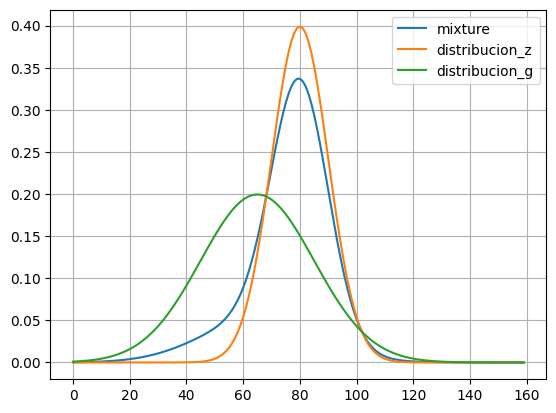

In [7]:
df_datos['mixture'].plot(legend='mixture')
df_datos['distribucion_z'].plot(legend='distribucion z')
df_datos['distribucion_g'].plot(legend='distribucion g').grid()



La mixture parece ser simetrica pero ahora calculamos el coeficiente de asimetria y la curtosis.
La asimetria esta relacionada con el 3er momento

In [24]:
print(f"coeficiente de asimetria: {df_datos['mixture'].skew()}")
print(f"Curtosis: {df_datos['mixture'].kurt()}")
df_datos.skew()


coeficiente de asimetria: 1.6703811094824474
Curtosis: 1.4401749001199713


serie             0.000000
distribucion_z    1.836739
distribucion_g    0.795037
mixture           1.670381
dtype: float64

### Aca se puede ver que es asimétrica positiva (hacia la derecha) porque el coeficiente da 1.8

In [4]:
from scipy.stats import skew

muestra = np.random.normal(loc=0, scale=1, size=len(df_datos))
print(skew(muestra))


NameError: name 'df_datos' is not defined

### Retornos diarios simples


,Close,Diferencias,Retornos diarios Simples,Diferencia de logaritmos
Date,,,,
2020-06-19,3097.739990,NaN,NaN,NaN
2020-06-22,3117.860107,20.120117,0.006495,0.006474
2020-06-23,3131.290039,13.429932,0.004307,0.004298
2020-06-24,3050.330078,-80.959961,-0.025855,-0.026195
2020-06-25,3083.760010,33.429932,0.010959,0.010900


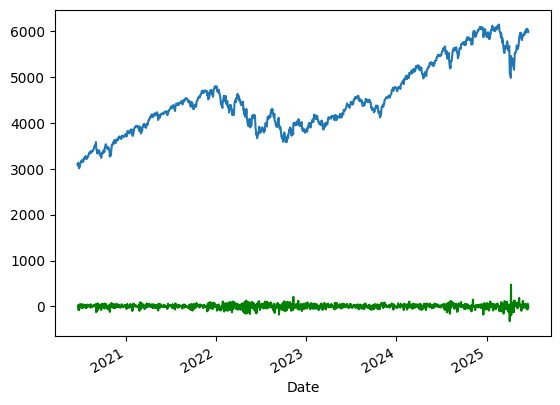

In [7]:
# parse_dates=True para que la columan date se use como objeto datetime
df = pd.read_excel('SP500_.xlsx', sheet_name=0,index_col="Date",parse_dates=True)

df.head()

df['Diferencias']=df.diff()["Close"]
df['Retornos diarios Simples']=df.diff()["Close"]/df['Close'].shift(1)
df['Diferencia de logaritmos']=np.log(df["Close"]/df['Close'].shift(1))



df['Close'].plot()
df['Diferencias'].plot(color='green')
df.head()



<Axes: xlabel='Date'>

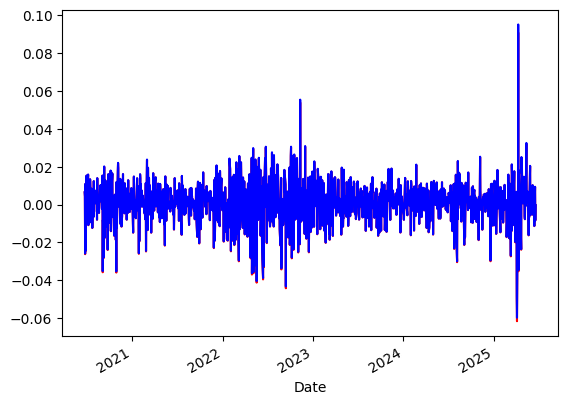

In [7]:
df['Diferencia de logaritmos'].plot(color='red')
df['Retornos diarios Simples'].plot(color='blue')

In [39]:
print(df['Retornos diarios Simples'].describe())
print(f"Curtosis en exceso al igual que el excel (Curtosis-3): {df['Retornos diarios Simples'].kurtosis()}")
df['momento 4']=((df['Retornos diarios Simples']-df['Retornos diarios Simples'].mean())/df['Retornos diarios Simples'].std())**4

print(f"Curtosis: {df['momento 4'].mean()}")

df['momento 4'].head()

count    1255.000000
mean        0.000585
std         0.011039
min        -0.059750
25%        -0.004965
50%         0.000888
75%         0.006860
max         0.095154
Name: Retornos diarios Simples, dtype: float64
Curtosis en exceso al igual que el excel (Curtosis-3): 6.15659391303418
Curtosis: 9.112776198657729


Date
2020-06-19          NaN
2020-06-22     0.082142
2020-06-23     0.012926
2020-06-24    32.909096
2020-06-25     0.779960
Name: momento 4, dtype: float64

# Obs: 
## El cálculo manual de curtosis da diferencia en decimale del que da python y excel. 

<Axes: >

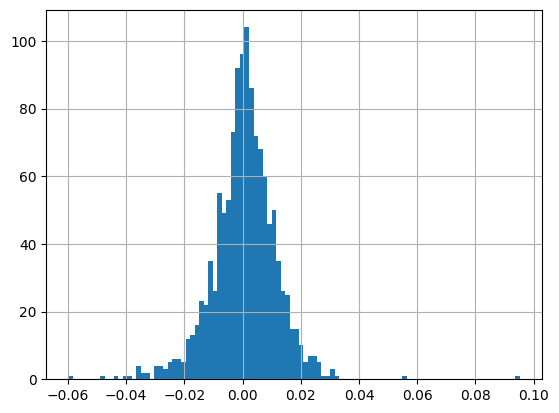

In [25]:
df['Retornos diarios Simples'].hist(bins=100)

# d) Distribución normal de los retornos de la la muestra

In [15]:
#Calculo los coeficientes de asimetria
df['momento 3']=((df['Retornos diarios Simples']-df['Retornos diarios Simples'].mean())/df['Retornos diarios Simples'].std())**3

print(f"skewness \"manual\": {df['momento 3'].mean()}")

df['momento 3'].head()
skewness=df["Retornos diarios Simples"].skew()
kE=df['Retornos diarios Simples'].kurtosis()
print(f"skewness: {skewness}")
n=df["Retornos diarios Simples"].count()
jb=(skewness**2+kE**2/4)*(n/6)
jb_stats=stats.jarque_bera(df["Retornos diarios Simples"].dropna())
print(f"Coefiente JB calculado: {jb}")
print(f"Coeficiente JB stats: {jb_stats.statistic}")
print(f"KE: {kE}")

skewness "manual": 0.061037696436965716
skewness: 0.06118387501933625
Coefiente JB calculado: 1982.8279669877122
Coeficiente JB stats: 1964.019495070657
KE: 6.15659391303418


Según el coeficiente JB de 1964.01949 los retornos de la muestra no se ajustan a una distribucieon normal por mucho.
Para un nivel de confianza del 95% el JB deberia estar en un valor de 5. 


## e) Retornos logaritmos diarios para un mes

In [129]:


from numpy import NaN


df_mes = df[(df.index >= '2023-06-01') & (df.index <= '2023-06-30')]

df_mes['retornos_logaritmicos']=np.log(df["Close"]/df['Close'].shift())
df_fila=df_mes.loc['2023-06-01','retornos_logaritmicos']=NaN #Tengo que haces esto explicitamente porque sino no da cuenta
sum_dif_log=df_mes["retornos_logaritmicos"].sum()
print(f"Las suma de las diferencias log de los retornos es: {sum_dif_log} ")

precio_inicio=df_mes.loc['2023-06-01','Close']
precio_fin=df_mes.loc['2023-06-30','Close']

retorno_logaritmico=np.log( (precio_fin/precio_inicio))

print(f"El retorno logaritmico es: {retorno_logaritmico} ")





Las suma de las diferencias log de los retornos es: 0.05291264982878766 
El retorno logaritmico es: 0.0529126498287879 


/var/folders/jr/t_k402pj3bg57t7p56rgmknr0000gn/T/ipykernel_52140/2985910778.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mes['retornos_logaritmicos']=np.log(df["Close"]/df['Close'].shift())
